# Player Rating Prediction for Fifa 2019

#### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd

In [10]:
from sklearn.impute import SimpleImputer

In [94]:
from sklearn.preprocessing import LabelEncoder

In [103]:
import statsmodels.api as sm

In [122]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [3]:
df = pd.read_csv('Fifa_dataset', parse_dates = ['Contract Valid Until'])
df = df.sample(frac = 1, random_state = 4).reset_index(drop = True)
df = df.drop(['Unnamed: 0', 'Photo', 'Club Logo', 'Flag'], axis = 1)
df.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Special,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,208927,H. Sulaimani,41,Saudi Arabia,63,63,Ohod Club,€0,€3K,1842,...,67.0,62.0,66.0,63.0,15.0,8.0,15.0,14.0,13.0,NaN
1,240111,Y. Nuxoll,20,Germany,55,67,SV Meppen,€140K,€1K,1174,...,39.0,54.0,57.0,55.0,9.0,11.0,9.0,9.0,11.0,€231K
2,244373,V. Buyalskyi,25,Ukraine,75,80,Dynamo Kyiv,€8.5M,€1K,1888,...,73.0,65.0,74.0,69.0,14.0,11.0,10.0,11.0,5.0,€18.5M
3,213368,L. Rougeaux,24,France,65,69,KV Kortrijk,€575K,€3K,1548,...,59.0,67.0,64.0,66.0,7.0,10.0,10.0,8.0,7.0,€906K
4,219106,F. Al Ansari,31,Kuwait,70,70,Al Faisaly,€1.2M,€13K,1760,...,73.0,63.0,66.0,61.0,9.0,7.0,6.0,7.0,11.0,€2M


#### Data Evaluation

In [5]:
df.shape

(18207, 85)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        18207 non-null  int64         
 1   Name                      18207 non-null  object        
 2   Age                       18207 non-null  int64         
 3   Nationality               18207 non-null  object        
 4   Overall                   18207 non-null  int64         
 5   Potential                 18207 non-null  int64         
 6   Club                      17966 non-null  object        
 7   Value                     18207 non-null  object        
 8   Wage                      18207 non-null  object        
 9   Special                   18207 non-null  int64         
 10  Preferred Foot            18159 non-null  object        
 11  International Reputation  18159 non-null  float64       
 12  Weak Foot         

In [7]:
# Checking NULL values
i=0 # postion 
n=len(df)
for col in df.columns:
  print(i,col,df[col].isnull().sum()/n*100)   # calculation the percentage of null value
  i=i+1    # from this loop we found Loan From = 95%

0 ID 0.0
1 Name 0.0
2 Age 0.0
3 Nationality 0.0
4 Overall 0.0
5 Potential 0.0
6 Club 1.323666721590597
7 Value 0.0
8 Wage 0.0
9 Special 0.0
10 Preferred Foot 0.26363486571099026
11 International Reputation 0.26363486571099026
12 Weak Foot 0.26363486571099026
13 Skill Moves 0.26363486571099026
14 Work Rate 0.26363486571099026
15 Body Type 0.26363486571099026
16 Real Face 0.26363486571099026
17 Position 0.32954358213873786
18 Jersey Number 0.32954358213873786
19 Joined 8.529686384357664
20 Loaned From 93.05761520294392
21 Contract Valid Until 1.5873015873015872
22 Height 0.26363486571099026
23 Weight 0.26363486571099026
24 LS 11.451639479321141
25 ST 11.451639479321141
26 RS 11.451639479321141
27 LW 11.451639479321141
28 LF 11.451639479321141
29 CF 11.451639479321141
30 RF 11.451639479321141
31 RW 11.451639479321141
32 LAM 11.451639479321141
33 CAM 11.451639479321141
34 RAM 11.451639479321141
35 LM 11.451639479321141
36 LCM 11.451639479321141
37 CM 11.451639479321141
38 RCM 11.4516394793

In [6]:
df.drop('Loaned From',axis=1,inplace=True) # as it contains 93% missing value, so we dropped it

In [7]:
df.drop('Jersey Number',axis=1,inplace =True)

In [8]:
df1 = df.copy() # df1 can be used in visualization
df.drop(['ID',"Name"],axis=1,inplace =True)

In [9]:
def take_num(string): # function to take the number from the string 
    string1 =str()
    for val in string:
        if val.isnumeric()==True:
            string1=string1+val
        elif val == '.':
            string1= string1+val
        else:
            continue
    return string1 

In [11]:
si = SimpleImputer(strategy="most_frequent")
df["Weight"]= si.fit_transform(df[['Weight']])

In [12]:
df['Weight']=df['Weight'].apply(take_num).astype(float)

In [13]:
df['Weight'].isnull().sum()

0

In [14]:
df['Value'].apply(take_num).astype(float)

0          0.0
1        140.0
2          8.5
3        575.0
4          1.2
         ...  
18202     70.0
18203    475.0
18204    180.0
18205    925.0
18206     70.0
Name: Value, Length: 18207, dtype: float64

In [15]:
df["Value_M"]=df['Value'].apply(take_num).astype(float)

In [16]:
df["Wage_K"] = df['Wage'].apply(take_num).astype(float)

In [17]:
df["Value_M"].isnull().sum()

0

In [18]:
df["Wage_K"].isnull().sum()

0

In [19]:
df['Release Clause'].isnull().sum()

1564

In [21]:
si = SimpleImputer(strategy = 'most_frequent')
df['Release Clause'] = si.fit_transform(df[["Release Clause"]])

In [22]:
df['Release Clause'].isnull().sum()

0

In [23]:
df["Release_clause_M"] = df['Release Clause'].apply(take_num).astype(float)

In [24]:
df["Release_clause_M"].head()

0      1.1
1    231.0
2     18.5
3    906.0
4      2.0
Name: Release_clause_M, dtype: float64

In [25]:
df[["Value_M","Wage_K","Release_clause_M"]].head()

,Value_M,Wage_K,Release_clause_M
0,0.0,3.0,1.1
1,140.0,1.0,231.0
2,8.5,1.0,18.5
3,575.0,3.0,906.0
4,1.2,13.0,2.0


In [26]:
df.drop(['Value',"Wage",'Release Clause'],axis=1,inplace=True)

In [27]:
df['Height'].isnull().sum()

48

In [28]:
si = SimpleImputer(strategy = 'most_frequent') #imputing values
df['Height'] = si.fit_transform(df[["Height"]])

In [29]:
df['Height'].isnull().sum()

0

In [30]:
def height_cal(h): #function to calculate height into inches
    return int(h[0])*12+int(h[2])
height_cal("5'8")

68

In [31]:
df["Height"]=df['Height'].apply(height_cal) 

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 81 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Age                       18207 non-null  int64         
 1   Nationality               18207 non-null  object        
 2   Overall                   18207 non-null  int64         
 3   Potential                 18207 non-null  int64         
 4   Club                      17966 non-null  object        
 5   Special                   18207 non-null  int64         
 6   Preferred Foot            18159 non-null  object        
 7   International Reputation  18159 non-null  float64       
 8   Weak Foot                 18159 non-null  float64       
 9   Skill Moves               18159 non-null  float64       
 10  Work Rate                 18159 non-null  object        
 11  Body Type                 18159 non-null  object        
 12  Real Face         

In [33]:
def field_cal(score): #calculating score for different field position 
    if int(score[:2])+int(score[-1])<100:
        return int(score[:2])+int(score[-1])
    else:
        return int(score[:2])

In [34]:
df.iloc[:,18:44].head(4)

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,58+2,58+2,58+2,61+2,60+2,60+2,60+2,61+2,62+2,62+2,...,62+2,66+2,66+2,66+2,62+2,61+2,66+2,66+2,66+2,61+2
1,35+2,35+2,35+2,31+2,31+2,31+2,31+2,31+2,30+2,30+2,...,41+2,42+2,42+2,42+2,41+2,44+2,53+2,53+2,53+2,44+2
2,65+2,65+2,65+2,72+2,71+2,71+2,71+2,72+2,73+2,73+2,...,72+2,70+2,70+2,70+2,72+2,70+2,62+2,62+2,62+2,70+2
3,51+2,51+2,51+2,50+2,49+2,49+2,49+2,50+2,48+2,48+2,...,63+2,62+2,62+2,62+2,63+2,63+2,65+2,65+2,65+2,63+2


In [35]:
si = SimpleImputer(strategy='most_frequent') # columns from field
for col in df.iloc[:,18:44].columns:
    df[col] = si.fit_transform(df[[col]])

In [36]:
for col in df.iloc[:,18:43].columns:
    df[col] = df[col].apply(field_cal)

In [37]:
df.iloc[:,18:43].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB
0,60,60,60,63,62,62,62,63,64,64,...,63,64,68,68,68,64,63,68,68,68
1,37,37,37,33,33,33,33,33,32,32,...,34,43,44,44,44,43,46,55,55,55
2,67,67,67,74,73,73,73,74,75,75,...,74,74,72,72,72,74,72,64,64,64
3,53,53,53,52,51,51,51,52,50,50,...,55,65,64,64,64,65,65,67,67,67
4,63,63,63,65,66,66,66,65,69,69,...,67,67,71,71,71,67,66,66,66,66


In [38]:
df['RB'] = df['RB'].apply(field_cal)

In [39]:
df.drop("Contract Valid Until",axis=1,inplace =True) # 

In [40]:
df['Joined'] =pd.to_datetime(df['Joined']) # convertingg joined from string to date

In [41]:
df['Experience'] = 2019 -df['Joined'].dt.year # creating experience column by using joining date

In [42]:
df.drop('Joined',axis=1,inplace=True) # dropping joining as we are using experience for our analysis
df['Experience'].head(4)

0    1.0
1    2.0
2    9.0
3    3.0
Name: Experience, dtype: float64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  int64  
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  int64  
 3   Potential                 18207 non-null  int64  
 4   Club                      17966 non-null  object 
 5   Special                   18207 non-null  int64  
 6   Preferred Foot            18159 non-null  object 
 7   International Reputation  18159 non-null  float64
 8   Weak Foot                 18159 non-null  float64
 9   Skill Moves               18159 non-null  float64
 10  Work Rate                 18159 non-null  object 
 11  Body Type                 18159 non-null  object 
 12  Real Face                 18159 non-null  object 
 13  Position                  18147 non-null  object 
 14  Height

In [45]:
num_cols = list(df.select_dtypes(exclude = 'object').columns) # numerical columns
print('Numerical Columns:', num_cols)
print('Number of numerical columns:',len(num_cols))

Numerical Columns: ['Age', 'Overall', 'Potential', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Value_M', 'Wage_K', 'Release_clause_M', 'Experience']
Number of numerical columns: 73


In [46]:
cat_cols = list(df.select_dtypes(include = 'object').columns) #categorical columns
print('Categorical Columns:', cat_cols)
print('Number of categorica columns:',len(cat_cols))

Categorical Columns: ['Nationality', 'Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Real Face', 'Position']
Number of categorica columns: 7


In [47]:
df = df.copy()
si = SimpleImputer(strategy = 'most_frequent')
df[cat_cols] = si.fit_transform(df[cat_cols])
df[cat_cols].isnull().sum()

Nationality       0
Club              0
Preferred Foot    0
Work Rate         0
Body Type         0
Real Face         0
Position          0
dtype: int64

In [48]:
df.head()

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Release_clause_M,Experience
0,41,Saudi Arabia,63,63,Ohod Club,1842,Left,1.0,3.0,3.0,...,63.0,15.0,8.0,15.0,14.0,13.0,0.0,3.0,1.1,1.0
1,20,Germany,55,67,SV Meppen,1174,Right,1.0,2.0,2.0,...,55.0,9.0,11.0,9.0,9.0,11.0,140.0,1.0,231.0,2.0
2,25,Ukraine,75,80,Dynamo Kyiv,1888,Right,1.0,4.0,3.0,...,69.0,14.0,11.0,10.0,11.0,5.0,8.5,1.0,18.5,9.0
3,24,France,65,69,KV Kortrijk,1548,Right,1.0,3.0,2.0,...,66.0,7.0,10.0,10.0,8.0,7.0,575.0,3.0,906.0,3.0
4,31,Kuwait,70,70,Al Faisaly,1760,Right,1.0,3.0,3.0,...,61.0,9.0,7.0,6.0,7.0,11.0,1.2,13.0,2.0,13.0


In [49]:
si = SimpleImputer(strategy = 'median')
df[num_cols] = si.fit_transform(df[num_cols])
df[num_cols].isnull().sum()

Age                         0
Overall                     0
Potential                   0
Special                     0
International Reputation    0
                           ..
GKReflexes                  0
Value_M                     0
Wage_K                      0
Release_clause_M            0
Experience                  0
Length: 73, dtype: int64

In [50]:
df.head()

,Age,Nationality,Overall,Potential,Club,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Value_M,Wage_K,Release_clause_M,Experience
0,41.0,Saudi Arabia,63.0,63.0,Ohod Club,1842.0,Left,1.0,3.0,3.0,...,63.0,15.0,8.0,15.0,14.0,13.0,0.0,3.0,1.1,1.0
1,20.0,Germany,55.0,67.0,SV Meppen,1174.0,Right,1.0,2.0,2.0,...,55.0,9.0,11.0,9.0,9.0,11.0,140.0,1.0,231.0,2.0
2,25.0,Ukraine,75.0,80.0,Dynamo Kyiv,1888.0,Right,1.0,4.0,3.0,...,69.0,14.0,11.0,10.0,11.0,5.0,8.5,1.0,18.5,9.0
3,24.0,France,65.0,69.0,KV Kortrijk,1548.0,Right,1.0,3.0,2.0,...,66.0,7.0,10.0,10.0,8.0,7.0,575.0,3.0,906.0,3.0
4,31.0,Kuwait,70.0,70.0,Al Faisaly,1760.0,Right,1.0,3.0,3.0,...,61.0,9.0,7.0,6.0,7.0,11.0,1.2,13.0,2.0,13.0


In [51]:
df.duplicated().isnull().sum() 

0

There are no duplicated rows in the data

#### EDA

##### Target (Overall)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

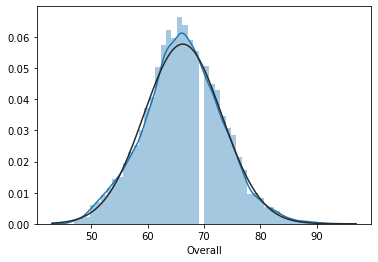

In [54]:
from scipy import stats
from scipy.stats import norm 
norm.fit(df['Overall'])
sns.distplot(df['Overall'],fit=norm)
plt.show()

###### Histogram of Player's age

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

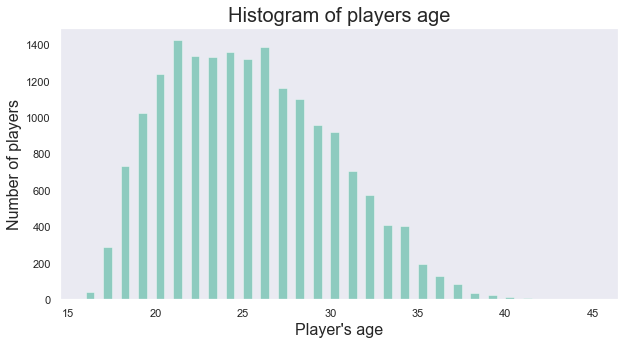

In [57]:
sns.set(style ="dark", palette="colorblind", color_codes=True)
x = df.Age
plt.figure(figsize=(10,5))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

##### Count of players on the position

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

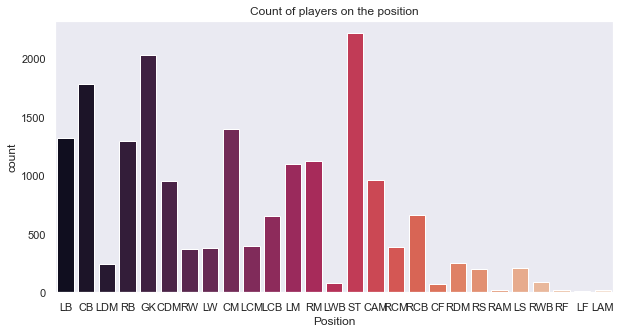

In [67]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'Position', data = df, palette = 'rocket')
ax.set_title(label='Count of players on the position')
plt.show()

##### Distribution of age in various clubs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

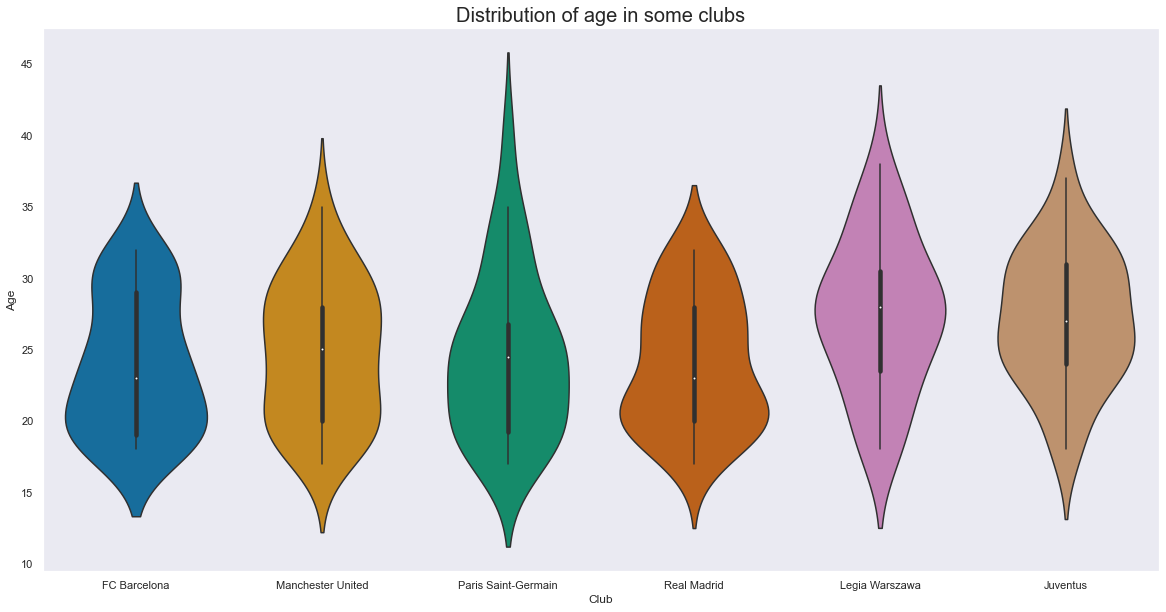

In [73]:
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age']]

fig, ax = plt.subplots()
fig.set_size_inches(20,10)
ax = sns.violinplot(x="Club", y="Age", data=df_club);
ax.set_title(label='Distribution of age in some clubs', fontsize=20);

##### Distribution of Shot Power with Preferred Foot

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

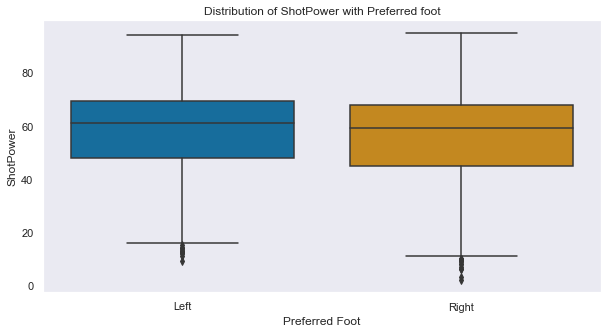

In [74]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'Preferred Foot', y = 'ShotPower', data = df)
plt.title('Distribution of ShotPower with Preferred foot')
plt.show()

##### The Performance of BallControl and Dribbling with Preferred Foot

<IPython.core.display.Javascript object>

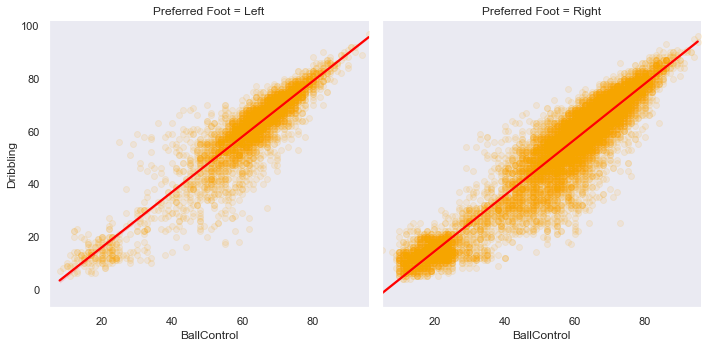

In [75]:
sns.lmplot(x = 'BallControl', y = 'Dribbling', data = df,col = 'Preferred Foot',scatter_kws = {'alpha':0.1,'color':'orange'},
           line_kws={'color':'red'})

##### Player's Overall Performance in various clubs

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

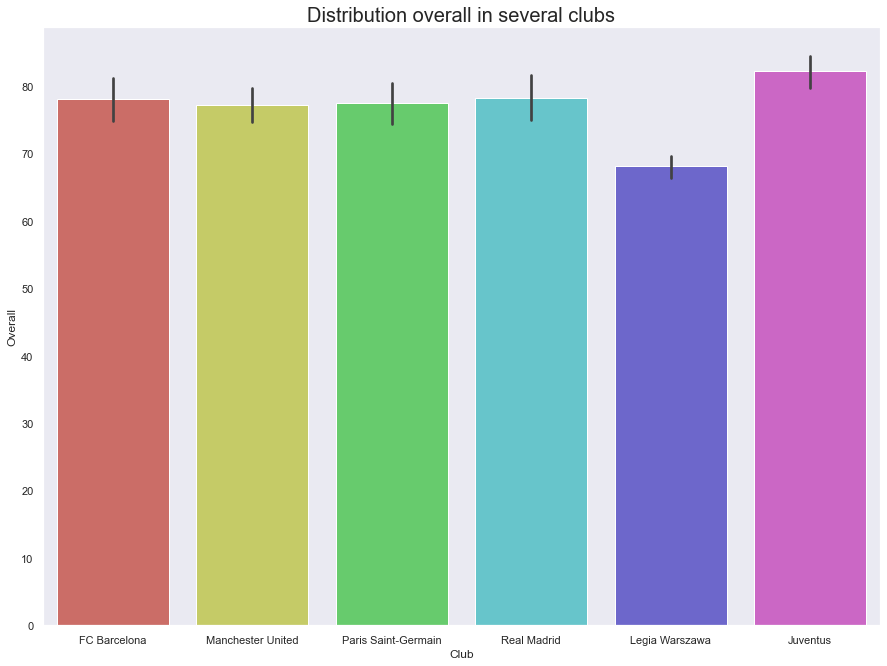

In [78]:
plt.figure(figsize = (15,11))
some_clubs = ('Juventus', 'Real Madrid', 'Paris Saint-Germain', 'FC Barcelona', 'Legia Warszawa', 'Manchester United')
df_club = df.loc[df['Club'].isin(some_clubs) & df['Age'] & df['Overall'] ]

ax = sns.barplot(x=df_club['Club'], y=df_club['Overall'], palette="hls");
ax.set_title(label='Distribution overall in several clubs', fontsize=20);

##### Potential vs Age

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 720x576 with 0 Axes>

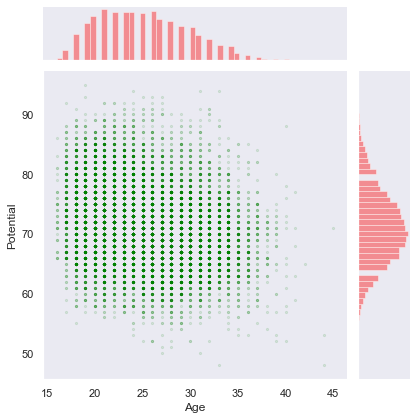

In [84]:
plt.figure(figsize = (10,8))
sns.jointplot(x=df['Age'],y=df['Potential'], joint_kws={'alpha':0.1,'s':5,'color':'green'}, marginal_kws={'color':'red'})
plt.show()

##### Relation dribbling and crossing with respected finishing of players

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

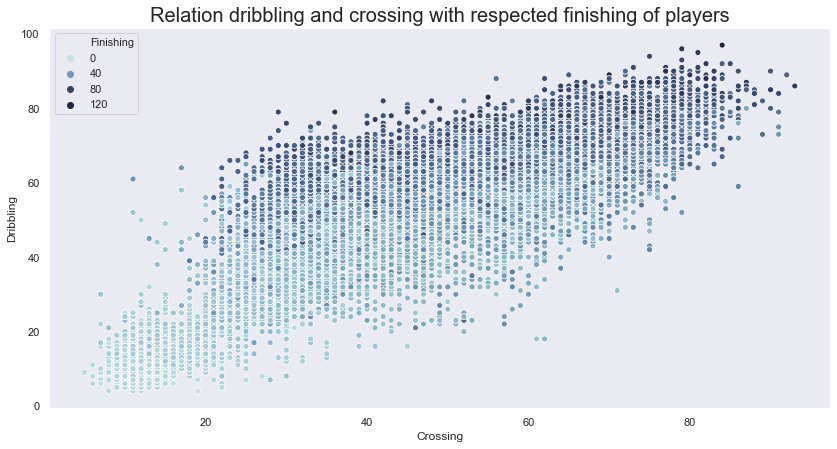

In [85]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Crossing', y='Dribbling',
                     hue='Finishing',
                     palette=cmap, sizes=(1, 1),
                     data=df)
ax.set_title(label='Relation dribbling and crossing with respected finishing of players', fontsize=20);

##### Relation stamina and age with respected sprint speed of players'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

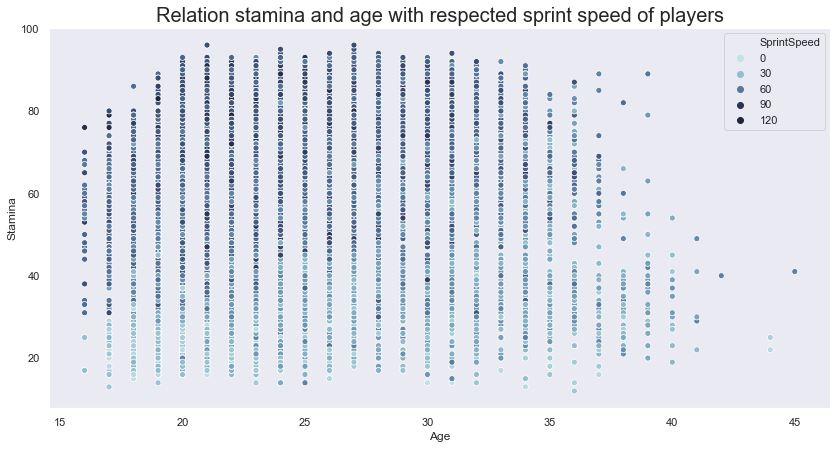

In [87]:
plt.figure(figsize=(14,7))
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)

ax = sns.scatterplot(x='Age', y='Stamina',
                     hue='SprintSpeed',
                     palette=cmap, sizes=(1, 1),
                     data=df)
ax.set_title(label='Relation stamina and age with respected sprint speed of players', fontsize=20);

##### Correlation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

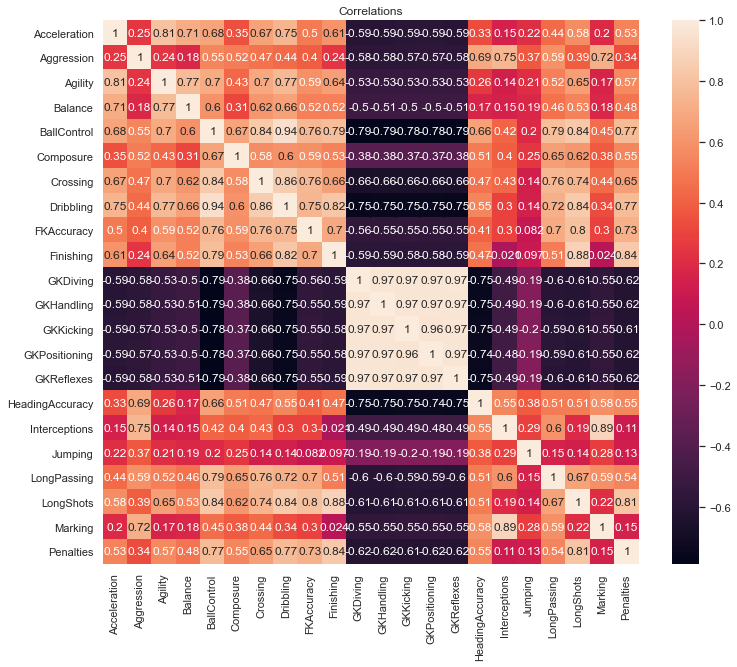

In [89]:
plt.figure(figsize = (12,10))
sns.heatmap(df[['Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Composure', 'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties']].corr(), annot = True)
plt.title('Correlations')
plt.show()

#### Statistical Model

In [90]:
df[cat_cols].nunique()

Nationality       164
Club              651
Preferred Foot      2
Work Rate           9
Body Type          10
Real Face           2
Position           27
dtype: int64

In [91]:
df =pd.get_dummies(data=df,columns=['Preferred Foot','Real Face'],drop_first=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  float64
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  float64
 3   Potential                 18207 non-null  float64
 4   Club                      18207 non-null  object 
 5   Special                   18207 non-null  float64
 6   International Reputation  18207 non-null  float64
 7   Weak Foot                 18207 non-null  float64
 8   Skill Moves               18207 non-null  float64
 9   Work Rate                 18207 non-null  object 
 10  Body Type                 18207 non-null  object 
 11  Position                  18207 non-null  object 
 12  Height                    18207 non-null  float64
 13  Weight                    18207 non-null  float64
 14  LS    

In [93]:
df['Height']

0        68.0
1        75.0
2        67.0
3        73.0
4        77.0
         ... 
18202    72.0
18203    69.0
18204    72.0
18205    74.0
18206    75.0
Name: Height, Length: 18207, dtype: float64

In [95]:
df_carbon= df.copy()
label = LabelEncoder()
df['encoded_nationality']=label.fit_transform(df['Nationality'])

In [96]:
df['encoding_club']=label.fit_transform(df['Club'])

In [97]:
df['encoding_body_type'] =label.fit_transform(df['Body Type'])

In [98]:
df['encoding_Position'] =label.fit_transform(df['Position'])

In [99]:
df['encoding_work_rate'] =label.fit_transform(df['Work Rate'])

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 85 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  float64
 1   Nationality               18207 non-null  object 
 2   Overall                   18207 non-null  float64
 3   Potential                 18207 non-null  float64
 4   Club                      18207 non-null  object 
 5   Special                   18207 non-null  float64
 6   International Reputation  18207 non-null  float64
 7   Weak Foot                 18207 non-null  float64
 8   Skill Moves               18207 non-null  float64
 9   Work Rate                 18207 non-null  object 
 10  Body Type                 18207 non-null  object 
 11  Position                  18207 non-null  object 
 12  Height                    18207 non-null  float64
 13  Weight                    18207 non-null  float64
 14  LS    

In [101]:
df.drop(['Nationality','Club',"Work Rate","Body Type",'Position'],axis= 1,inplace=True)

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 80 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       18207 non-null  float64
 1   Overall                   18207 non-null  float64
 2   Potential                 18207 non-null  float64
 3   Special                   18207 non-null  float64
 4   International Reputation  18207 non-null  float64
 5   Weak Foot                 18207 non-null  float64
 6   Skill Moves               18207 non-null  float64
 7   Height                    18207 non-null  float64
 8   Weight                    18207 non-null  float64
 9   LS                        18207 non-null  float64
 10  ST                        18207 non-null  float64
 11  RS                        18207 non-null  float64
 12  LW                        18207 non-null  float64
 13  LF                        18207 non-null  float64
 14  CF    

In [104]:
y=df['Overall'] 
X =df.drop("Overall",axis=1)
Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     3900.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:16:13   Log-Likelihood:                -36655.
No. Observations:               18207   AIC:                         7.344e+04
Df Residuals:                   18143   BIC:                         7.394e+04
Df Model:                          63                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -14.2531      0.439    -32.457      0.000     -15.114     -13.392
Age                          0.4964      0.005     91.653      0.000       0.486       0.507
Potential                    0.4803      0.004    113.423      0.000       0.472       0.489
Special                      0.0105      0.002      6.180      0.000       0.007       0.014
International Reputation    -0.2007      0.050     -4.041      0.000      -0.298      -0.103
Weak Foot                    0.0168      0.022      0.747      0.455      -0.027       0.061
Skill Moves                  0.8059      0.036     22.154      0.000       0.735       0.877
Height                       0.0244      0.003      7.737      0.000       0.018       0.031
Weight                       0.0071      0.001      4.818      0.000       0.004       0.010
LS                           0.0282      0.010      2.821      0.005       0.009       0.048
ST                           0.0282      0.010      2.821      0.005       0.009       0.048
RS                           0.0282      0.010      2.821      0.005       0.009       0.048
LW                          -0.0349      0.020     -1.770      0.077      -0.074       0.004
LF                          -0.0500      0.014     -3.694      0.000      -0.076      -0.023
CF                          -0.0500      0.014     -3.694      0.000      -0.076      -0.023
RF                          -0.0500      0.014     -3.694      0.000      -0.076      -0.023
RW                          -0.0349      0.020     -1.770      0.077      -0.074       0.004
LAM                         -0.0368      0.013     -2.841      0.004      -0.062      -0.011
CAM                         -0.0368      0.013     -2.841      0.004      -0.062      -0.011
RAM                         -0.0368      0.013     -2.841      0.004      -0.062      -0.011
LM                           0.0812      0.020      4.000      0.000       0.041       0.121
LCM                          0.0139      0.011      1.257      0.209      -0.008       0.036
CM                           0.0139      0.011      1.257      0.209      -0.008       0.036
RCM                          0.0139      0.011      1.257      0.209      -0.008       0.036
RM                           0.0812      0.020      4.000      0.000       0.041       0.121
LWB                          0.0408      0.019      2.109      0.035       0.003       0.079
LDM                          0.0421      0.012      3.541      0.000       0.019       0.065
CDM                          0.0421      0.012      3.541      0.000       0.019       0.065
RDM                          0.0421      0.012      3.541      0.000       0.019       0.065
RWB                          0.0408      0.019      2.109      0.035       0.003       0.079
LB            

In [105]:
cols = list(Xc.columns)   # using backward elimination in stats model

while len(cols)>0:
    X1 = Xc[cols]
    model = sm.OLS(y, X1).fit()
    p=model.pvalues
    p= p.drop(labels=['const'])
    pmax = max(p)
    feature_pmax = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_pmax)
        print(feature_pmax,pmax)
    else:
        break
        
selected_cols=cols
print(selected_cols)

LB 0.9897758057120271
RB 0.9897758057118496
ShotPower 0.8991187102072012
Agility 0.557850574981228
Dribbling 0.6371792511297105
Weak Foot 0.4604216977871811
Stamina 0.3997331569562965
StandingTackle 0.1799602085705273
LCM 0.13240125903491315
CM 0.1324012590346342
RCM 0.13240125903457176
Value_M 0.12524989779004414
LongShots 0.1236194644873659
Marking 0.07991179069361963
encoding_club 0.05481225341642472
GKKicking 0.05172954225185909
['const', 'Age', 'Potential', 'Special', 'International Reputation', 'Skill Moves', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LCB', 'CB', 'RCB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'Balance', 'Jumping', 'Strength', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'SlidingTackle', 'GKDiving', 'GKHandlin

In [106]:
# runnning model with significant variables 
y=df['Overall']

X =df[[ 'Age', 'Potential', 'Special', 'International Reputation', 'Skill Moves', 'Height',
       'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'RM',
       'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LCB', 'CB', 'RCB', 'Crossing', 'Finishing', 'HeadingAccuracy',
       'ShortPassing', 'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 
       'Reactions', 'Balance', 'Jumping', 'Strength', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 
       'Penalties', 'Composure', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKPositioning', 'GKReflexes', 'Wage_K',
       'Release_clause_M', 'Experience', 'Preferred Foot_Right', 'Real Face_Yes', 'encoded_nationality', 
       'encoding_body_type', 'encoding_Position', 'encoding_work_rate']]

Xc = sm.add_constant(X)
model = sm.OLS(y,Xc).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     4911.
Date:                Tue, 13 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:16:51   Log-Likelihood:                -36666.
No. Observations:               18207   AIC:                         7.343e+04
Df Residuals:                   18156   BIC:                         7.383e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -14.1430      0.435    -32.502      0.000     -14.996     -13.290
Age                          0.4974      0.005     92.529      0.000       0.487       0.508
Potential                    0.4814      0.004    114.763      0.000       0.473       0.490
Special                      0.0102      0.001     14.614      0.000       0.009       0.012
International Reputation    -0.2014      0.050     -4.059      0.000      -0.299      -0.104
Skill Moves                  0.8063      0.036     22.275      0.000       0.735       0.877
Height                       0.0243      0.003      7.710      0.000       0.018       0.031
Weight                       0.0072      0.001      4.895      0.000       0.004       0.010
LS                           0.0236      0.007      3.364      0.001       0.010       0.037
ST                           0.0236      0.007      3.364      0.001       0.010       0.037
RS                           0.0236      0.007      3.364      0.001       0.010       0.037
LW                          -0.0472      0.016     -2.884      0.004      -0.079      -0.015
LF                          -0.0464      0.012     -3.752      0.000      -0.071      -0.022
CF                          -0.0464      0.012     -3.752      0.000      -0.071      -0.022
RF                          -0.0464      0.012     -3.752      0.000      -0.071      -0.022
RW                          -0.0472      0.016     -2.884      0.004      -0.079      -0.015
LAM                         -0.0354      0.010     -3.401      0.001      -0.056      -0.015
CAM                         -0.0354      0.010     -3.401      0.001      -0.056      -0.015
RAM                         -0.0354      0.010     -3.401      0.001      -0.056      -0.015
LM                           0.0962      0.016      6.044      0.000       0.065       0.127
RM                           0.0962      0.016      6.044      0.000       0.065       0.127
LWB                          0.0320      0.013      2.506      0.012       0.007       0.057
LDM                          0.0496      0.010      5.186      0.000       0.031       0.068
CDM                          0.0496      0.010      5.186      0.000       0.031       0.068
RDM                          0.0496      0.010      5.186      0.000       0.031       0.068
RWB                          0.0320      0.013      2.506      0.012       0.007       0.057
LCB                         -0.0346      0.006     -5.723      0.000      -0.046      -0.023
CB                          -0.0346      0.006     -5.723      0.000      -0.046      -0.023
RCB                         -0.0346      0.006     -5.723      0.000      -0.046      -0.023
Crossing                    -0.0184      0.004     -5.139      0.000      -0.025      -0.011
Finishing     

In [107]:
# backward elimination using while loop
cols = list(Xc.columns)   # using backward elimination in stats model

while len(cols)>0:
    X1 = Xc[cols]
    model = sm.OLS(y, X1).fit()
    p=model.pvalues
    p= p.drop(labels=['const'])
    pmax = max(p)
    feature_pmax = p.idxmax()
    if (pmax>0.05):
        cols.remove(feature_pmax)
        print(feature_pmax,pmax)
    else:
        break
        
selected_cols=cols
print(selected_cols)

['const', 'Age', 'Potential', 'Special', 'International Reputation', 'Skill Moves', 'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LCB', 'CB', 'RCB', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Reactions', 'Balance', 'Jumping', 'Strength', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKPositioning', 'GKReflexes', 'Wage_K', 'Release_clause_M', 'Experience', 'Preferred Foot_Right', 'Real Face_Yes', 'encoded_nationality', 'encoding_body_type', 'encoding_Position', 'encoding_work_rate']


In [108]:
len(selected_cols)

64

The above list the show the significant variable that impacts the overall rating of the player

#### Testing the Assumptions

##### Assumption 1: Normality of Residuals

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

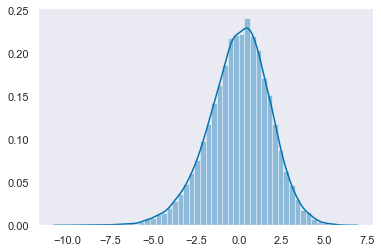

In [109]:
residuals = model.resid
sns.distplot(residuals)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

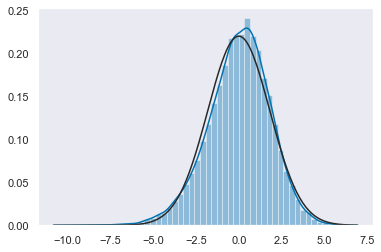

In [110]:
from scipy.stats import norm
norm.fit(residuals)
sns.distplot(residuals, fit = norm) # black line = std.
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

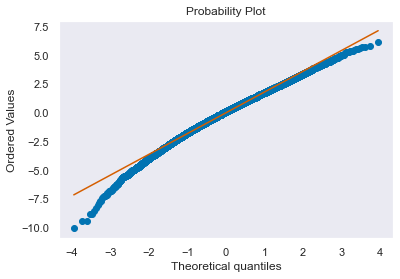

In [111]:
# Q-Q plot

import scipy.stats as st
st.probplot(residuals, plot = plt)
plt.show()

In [112]:
print(st.jarque_bera(residuals))

Jarque_beraResult(statistic=693.0073725550892, pvalue=0.0)


- H0: Data is normal
- H1: Data is not normal

Since P value is less than the significance level (0.05) , we will reject the H0 and conclude that residuals are not normal.

##### Assumption 2 : Multicollinearity

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

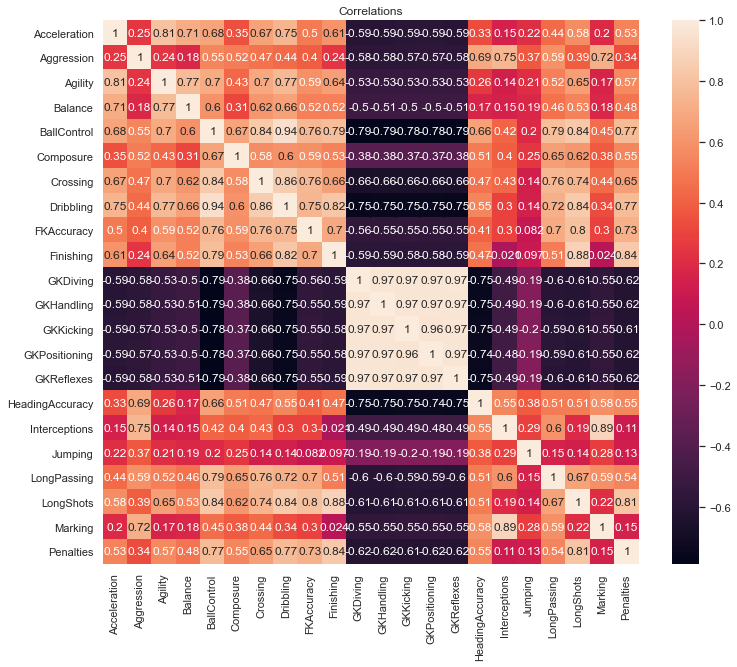

In [113]:
plt.figure(figsize = (12,10))
sns.heatmap(df[['Acceleration', 'Aggression', 'Agility', 'Balance', 'BallControl', 'Composure', 'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties']].corr(), annot = True)
plt.title('Correlations')
plt.show()

In [114]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

vf = [vif(Xc.values, i) for i in range(Xc.shape[1])]
pd.DataFrame(vf, index=Xc.columns, columns=['vif'])

C:\Users\admin\anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif
const,1046.082222
Age,3.481507
Potential,3.660516
Special,200.742771
International Reputation,2.106685
...,...
Real Face_Yes,1.452405
encoded_nationality,1.021809
encoding_body_type,1.222326
encoding_Position,1.788683


##### Assumption 3: Constant variance of residuals (Homoscendasticity)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

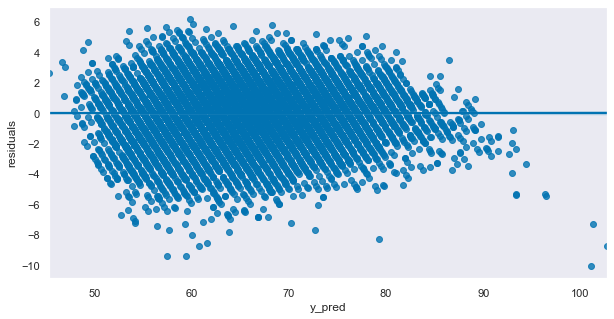

In [116]:
residuals=model.resid
y_pred=model.predict(Xc)
plt.figure(figsize=(10,5))
sns.regplot(x=y_pred,y=residuals)
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

In [117]:
import statsmodels.stats.api as sms

In [118]:
test=sms.het_goldfeldquandt(y=residuals,x=Xc)
test

(1.0098270212536673, 0.32089458843022417, 'increasing')

- H0 : variance (residuals) is constant across the range of data
- H1 : variance (residuals) is not constant across the range of data  

Since P value (0.320) is higher than the significance level, we will reject the H0 to conclude that variance (residuals) is not constant.

###### Assumption 4: Auto-correlation

<IPython.core.display.Javascript object>

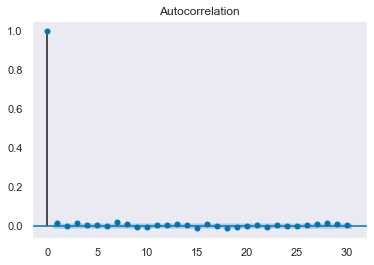

In [119]:
import statsmodels.tsa.api as smt
acf=smt.graphics.plot_acf(residuals,lags=30)
plt.show()

ACF plot shows that all correlation values are inside the confidence region indicating no presence of strong autocorrelation.
Also Durbin-Watson values is 1.94 (very close to 2) indicating no strong autocorrelation

##### Assumption 5:  Linearity of Relationship

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

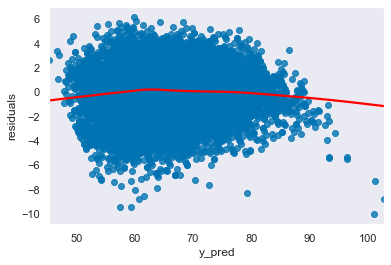

In [120]:
residuals=model.resid


sns.regplot(x=y_pred,y=residuals,lowess=True,line_kws={'color':'red'})
plt.xlabel('y_pred')
plt.ylabel('residuals')
plt.show()

The plot of residuals with y_pred shows that there is a change in pattern of residuals(for a perfect model, we 
would expect residuals to be scattered around horizontal line starting at 0).    

In [121]:
import statsmodels.api as sm
sm.stats.diagnostic.linear_rainbow(model,frac=0.5)

(1.013798082344859, 0.2569460350867301)

- H0: fit of model using full sample = fit of model using a central subset (linear relationship)
- H1: fit of model using full sample is worse compared  to fit of model using a central subset
    
Since P value is 0.25, more than the significance level. Hence, we will not reject H0.

#### Machine Learning Model

#### Feature Selection

In [123]:
y=df['Overall'] # forward approach 
X =df.drop("Overall",axis=1)
lir = LinearRegression(fit_intercept=True)
sfs1=sfs(lir,k_features='best',forward=True,scoring='r2',cv=3)
sfs1=sfs1.fit(X,y)

In [124]:
pd.DataFrame(sfs1.subsets_).T

,feature_idx,cv_scores,avg_score,feature_names
1,"(47,)","[0.7229288286995194, 0.7205108519522719, 0.721...",0.72164,"(Reactions,)"
2,"(1, 47)","[0.7959820284832932, 0.7885549216516161, 0.787...",0.790518,"(Potential, Reactions)"
3,"(0, 1, 47)","[0.8923987203421788, 0.8876917814009107, 0.886...",0.888934,"(Age, Potential, Reactions)"
4,"(0, 1, 20, 47)","[0.8995770021478222, 0.8957888273541477, 0.893...",0.896235,"(Age, Potential, LCM, Reactions)"
5,"(0, 1, 20, 47, 52)","[0.9056632648405099, 0.9037903714409946, 0.901...",0.903666,"(Age, Potential, LCM, Reactions, Strength)"
...,...,...,...,...
75,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9316786902465692, 0.9299974522999095, 0.929...",0.930446,"(Age, Potential, Special, International Reputa..."
76,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9317132578935364, 0.9299747641748414, 0.929...",0.930441,"(Age, Potential, Special, International Reputa..."
77,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9317132578935364, 0.9299747641748417, 0.929...",0.930441,"(Age, Potential, Special, International Reputa..."
78,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0.9317014532539046, 0.9299701881659073, 0.929...",0.930434,"(Age, Potential, Special, International Reputa..."


In [125]:
selected_features= list(sfs1.k_feature_names_)
selected_features

['Age',
 'Potential',
 'Special',
 'International Reputation',
 'Weak Foot',
 'Skill Moves',
 'Height',
 'Weight',
 'LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LDM',
 'CDM',
 'RCB',
 'Crossing',
 'Finishing',
 'HeadingAccuracy',
 'ShortPassing',
 'Volleys',
 'Dribbling',
 'Curve',
 'FKAccuracy',
 'LongPassing',
 'BallControl',
 'Acceleration',
 'SprintSpeed',
 'Agility',
 'Reactions',
 'Balance',
 'ShotPower',
 'Jumping',
 'Stamina',
 'Strength',
 'LongShots',
 'Aggression',
 'Interceptions',
 'Positioning',
 'Vision',
 'Penalties',
 'Composure',
 'Marking',
 'SlidingTackle',
 'GKDiving',
 'GKHandling',
 'GKKicking',
 'GKPositioning',
 'GKReflexes',
 'Value_M',
 'Wage_K',
 'Release_clause_M',
 'Experience',
 'Preferred Foot_Right',
 'Real Face_Yes',
 'encoded_nationality',
 'encoding_club',
 'encoding_body_type',
 'encoding_Position',
 'encoding_work_rate']

In [126]:
y = df['Overall']

X =df[selected_features] # when using select features by forward approach
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

lir = LinearRegression(fit_intercept=True)

lir.fit(X_train, y_train)
y_train_pred = lir.predict(X_train)

r2_Train = r2_score(y_train, y_train_pred)
rmse_Train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('r2-Train: ', r2_Train, 'rmse_Train: ', rmse_Train)

y_test_pred = lir.predict(X_test)

r2_Test = r2_score(y_test, y_test_pred)
rmse_Test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2-Test: ', r2_Test, 'rmse_Test: ', rmse_Test)


r2-Train:  0.9317523009840257 rmse_Train:  1.809834290843368
r2-Test:  0.9294318905632732 rmse_Test:  1.8233716624552252


In [127]:
y = df['Overall'] # when using all variable 
X =df.drop('Overall',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.3, random_state=42)

lir = LinearRegression(fit_intercept=True)

lir.fit(X_train, y_train)
y_train_pred = lir.predict(X_train)

r2_Train = r2_score(y_train, y_train_pred)
rmse_Train = np.sqrt(mean_squared_error(y_train, y_train_pred))

print('r2-Train: ', r2_Train, 'rmse_Train: ', rmse_Train)

y_test_pred = lir.predict(X_test)

r2_Test = r2_score(y_test, y_test_pred)
rmse_Test = np.sqrt(mean_squared_error(y_test, y_test_pred))

print('r2-Test: ', r2_Test, 'rmse_Test: ', rmse_Test)


r2-Train:  0.9317523009840257 rmse_Train:  1.809834290843368
r2-Test:  0.9294318905632732 rmse_Test:  1.8233716624552252


In [128]:
y=df['Overall'] # forward approach 
X =df[list(sfs1.k_feature_names_)]
lir = LinearRegression(fit_intercept=True)
sfs1=sfs(lir,k_features='best',forward=True,scoring='r2',cv=3)
sfs1=sfs1.fit(X,y)

In [129]:
df.head()

,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Height,Weight,LS,...,Wage_K,Release_clause_M,Experience,Preferred Foot_Right,Real Face_Yes,encoded_nationality,encoding_club,encoding_body_type,encoding_Position,encoding_work_rate
0,41.0,63.0,63.0,1842.0,1.0,3.0,3.0,68.0,154.0,60.0,...,3.0,1.1,1.0,0,0,130,415,3,7,2
1,20.0,55.0,67.0,1174.0,1.0,2.0,2.0,75.0,187.0,37.0,...,1.0,231.0,2.0,1,0,59,508,6,1,8
2,25.0,75.0,80.0,1888.0,1.0,4.0,3.0,67.0,134.0,67.0,...,1.0,18.5,9.0,1,0,155,195,3,10,0
3,24.0,65.0,69.0,1548.0,1.0,3.0,2.0,73.0,187.0,53.0,...,3.0,906.0,3.0,1,0,55,333,6,17,8
4,31.0,70.0,70.0,1760.0,1.0,3.0,3.0,77.0,161.0,63.0,...,13.0,2.0,13.0,1,0,88,30,3,10,8


It was observed that the R square value of the model is 0.92943189, which explains the good amount of variance present in the target variable. The difference in the R square value of test and train data was not significant, it can be concluded that the model does not need further treatment for the optimization. 